## **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import copy
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
dataset = pd.read_csv("profil_ibu (1).csv")
dataset

,Usia (tahun),Tinggi Badan (m),Berat Badan (kg),Klasifikasi,IMT (kg/m2),Lama Kehamilan (hari),Berat Lahir Bayi (kg),Status
0,27.0,1.5748,45.359200,Normal,18.290037,284.0,3.401940,0
1,33.0,1.6256,61.234920,Gemuk,23.172440,282.0,3.203493,0
2,28.0,1.6256,52.163080,Normal,19.739486,279.0,3.628736,0
3,36.0,1.7526,86.182480,Obesitas,28.057784,0.0,3.486988,0
4,23.0,1.7018,56.699000,Normal,19.577551,282.0,3.061746,0
...,...,...,...,...,...,...,...,...
1231,27.0,1.5240,45.359200,Normal,19.529695,275.0,3.203493,0
1232,24.0,1.7018,54.431040,Normal,18.794449,265.0,3.628736,0
1233,30.0,1.6510,68.038800,Gemuk,24.961030,291.0,3.685435,0
1234,21.0,1.6510,49.895120,Normal,18.304755,281.0,3.543687,0


In [3]:
dataset.shape

(1236, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Usia (tahun)           1236 non-null   float64
 1   Tinggi Badan (m)       1236 non-null   float64
 2   Berat Badan (kg)       1236 non-null   float64
 3   Klasifikasi            1236 non-null   object 
 4   IMT (kg/m2)            1217 non-null   float64
 5   Lama Kehamilan (hari)  1236 non-null   float64
 6   Berat Lahir Bayi (kg)  1236 non-null   float64
 7   Status                 1236 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 77.4+ KB


In [5]:
dataset.describe()

,Usia (tahun),Tinggi Badan (m),Berat Badan (kg),IMT (kg/m2),Lama Kehamilan (hari),Berat Lahir Bayi (kg),Status
count,1236.000000,1236.000000,1236.000000,1217.000000,1236.000000,1236.000000,1236.000000
mean,27.211165,1.597857,56.644319,inf,276.400485,3.389944,0.018608
std,5.879759,0.224438,13.571602,NaN,32.663624,0.516994,0.135192
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.559222,0.000000
25%,23.000000,1.574800,50.802304,19.911134,272.000000,3.083008,0.000000
50%,26.000000,1.625600,56.699000,21.256810,280.000000,3.401940,0.000000
75%,31.000000,1.676400,62.595696,23.344088,288.000000,3.713785,0.000000
max,45.000000,1.828800,113.398000,inf,353.000000,4.989512,1.000000


In [6]:
dataset = dataset.drop(['Klasifikasi','IMT (kg/m2)','Lama Kehamilan (hari)','Berat Lahir Bayi (kg)'], axis=1)

In [7]:
dataset.corr()

,Usia (tahun),Tinggi Badan (m),Berat Badan (kg),Status
Usia (tahun),1.000000,0.037873,0.126405,-0.049768
Tinggi Badan (m),0.037873,1.000000,0.552981,-0.822800
Berat Badan (kg),0.126405,0.552981,1.000000,-0.520107
Status,-0.049768,-0.822800,-0.520107,1.000000


In [8]:
dataset.shape

(1236, 4)

In [9]:
from imblearn.over_sampling import SMOTE


In [10]:


# Split features and labels
Y = dataset['Status'].values.reshape(dataset.shape[0],)
dataset = dataset.drop('Status',axis=1)
data = dataset.values
X = data[:,0:data.shape[1]]

In [11]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [12]:
print("Panjang X_resampled:", len(X_resampled))
print("Panjang y_resampled:", len(y_resampled))


Panjang X_resampled: 2426
Panjang y_resampled: 2426


In [13]:

#Splitting the Data into Training (90%) and Testing (10%)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)


In [14]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[23.          1.651      55.338224  ]
 [34.          1.5494     56.699     ]
 [28.          0.          0.        ]
 [32.74755936  0.          0.        ]
 [24.          1.651      62.142104  ]]
Type of X_train: <class 'numpy.ndarray'>


In [15]:
# Mengurangi jumlah data training
X_train = X_train[:len(X_train) // 10]
y_train = y_train[:len(y_train) // 10]

In [16]:
print("Jumlah data training setelah pengurangan: ", len(X_train))
print("Jumlah label training setelah pengurangan: ", len(y_train))

Jumlah data training setelah pengurangan:  218
Jumlah label training setelah pengurangan:  218


In [17]:
print("Jumlah data testing setelah pengurangan: ", len(X_test))
print("Jumlah label testing setelah pengurangan: ", len(y_test))

Jumlah data testing setelah pengurangan:  243
Jumlah label testing setelah pengurangan:  243


In [18]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0 0 1 1 0]
Type of y_train: <class 'numpy.ndarray'>


In [19]:
#Check the dimensions of variables
print(f'The shape of X_train is: {str(X_train.shape)}')
print(f'The shape of y_train is: {str(y_train.shape)}')
print(f'We have m = {len(y_train)} training examples')

The shape of X_train is: (218, 3)
The shape of y_train is: (218,)
We have m = 218 training examples


## **Logistic Regression Model**

In [20]:
# Membentuk fungsi aktivasi sigmoid untuk membuat model
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [21]:
# Mendefinisikan fungsi cost untuk evaluasi
def compute_cost(X, y, w, b, *argv):

    m, n = X.shape
    
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    total_cost = cost / m

    return total_cost

In [22]:
def compute_gradient(X, y, w, b, *argv): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i][j]
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_db, dj_dw

In [23]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:      
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history

In [30]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(3) - 0.5)
initial_b = 10

iterations = 1000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     4.08   
Iteration  100: Cost     0.10   
Iteration  200: Cost     0.10   
Iteration  300: Cost     0.10   
Iteration  400: Cost     0.10   
Iteration  500: Cost     0.10   
Iteration  600: Cost     0.10   
Iteration  700: Cost     0.10   
Iteration  800: Cost     0.10   
Iteration  900: Cost     0.10   
Iteration  999: Cost     0.10   


In [31]:
def predict(X, w, b): 
  
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]
        
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = f_wb >= 0.5
    return p

In [32]:
# Tes model prediksi
np.random.seed(1)
tmp_w = np.random.randn(3)
tmp_b = 0.3    
tmp_X = np.array([[20., 1.5, 36]]) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (1,), value [1.]


In [33]:
# Menghitung akurasi model prediksi
p = predict(X_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 95.884774


**Evaluasi dengan confusion matrix**

In [34]:
from sklearn.metrics import confusion_matrix

# Melakukan prediksi pada data test
predictions = predict(X_test, w, b)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[124   4]
 [  6 109]]


In [35]:
# Menentukan input Anda
custom_input = np.array([[30, 10, 20]]) # Ganti nilai1, nilai2, nilai3 dengan nilai yang sesuai

# Menjalankan prediksi
custom_prediction = predict(custom_input, w, b)

# Menampilkan hasil prediksi
print(f'Output of predict: shape {custom_prediction.shape}, value {custom_prediction}')


Output of predict: shape (1,), value [1.]


**Evaluasi dengan cross-validation dengan 5-fold**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve

model = LogisticRegression()

In [37]:
# Melakukan cross-validation dengan 5-fold
scores = cross_val_score(model, X, Y, cv=5)

In [38]:
# Menghitung rata-rata skor
mean_score = scores.mean()
print('Mean cross-validation score:', mean_score)

Mean cross-validation score: 0.9967643985895259


**Evaluasi dengan Learning Curve**

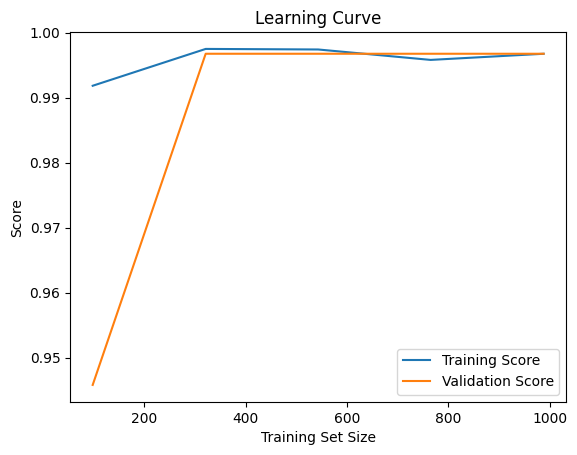

In [40]:
import matplotlib.pyplot as plt

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(model, X, Y, cv=5)

# Menghitung rata-rata skor pada setiap ukuran subset pelatihan
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plotting kurva pembelajaran
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

## **Convert Model Pickle & TTFLite**

In [41]:
import pickle

with open("predict.pkl", "wb") as file:
  pickle.dump(predict, file)

In [42]:
import pickle

with open("predict.pkl", "rb") as file:
  model = pickle.load(file)

In [43]:
import tensorflow as tf


Convert TFLite

In [44]:
# Definisi model logistic regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(3,))
])

In [45]:
# Mengambil nilai bobot (w) dan bias (b) dari model logistic regression
w, b = model.get_weights()

# Membuat konverter TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [46]:
# Mengonversi model menjadi format TFLite
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open('logistic_regression.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpf_gg9t5z\assets


In [47]:
# Menguji model TFLite
interpreter = tf.lite.Interpreter(model_path='logistic_regression.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [48]:
# Mengubah input menjadi numpy array
input_data = np.array([[20., 1.5, 36.]], dtype=np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)


In [49]:
# Menjalankan inferensi
interpreter.invoke()

# Mendapatkan output
output_data = interpreter.get_tensor(output_details[0]['index'])

In [50]:
# Menampilkan hasil prediksi
print(f'Output of TFLite model: shape {output_data.shape}, value {output_data}')

Output of TFLite model: shape (1, 1), value [[0.99999994]]
